In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/preped_data.csv')
#drop all the columns that are not numeric
df = df.select_dtypes(include=[np.number])
#drop PassangerId
df = df.drop(['PassengerId'], axis=1)
print(df.columns)
# drop missing values
df = df.dropna()
y = df['Survived']
X = df.drop(['Survived'], axis=1)
y.value_counts()


# data is inbalanced, but curently we are going to use accuracy as our metric

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Sex_female', 'Sex_male',
       'fam_size', 'Alone', 'Adult', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'],
      dtype='object')


Survived
0.0    548
1.0    339
Name: count, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split

# drop rows with missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

# Use k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# first with 4 neighbors
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_on_train = accuracy_score(y_train, y_train_pred)
print("Results with 4 neighbors")
print(accuracy_on_train)

y_test_pred = model.predict(X_test)
accuracy_on_test = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test)


# now test it with 10 neighbors
print("Results with 10 neighbors")
model_10 = KNeighborsClassifier(n_neighbors=10)
model_10.fit(X_train, y_train)
y_train_pred_10 = model_10.predict(X_train)
accuracy_on_train_10 = accuracy_score(y_train, y_train_pred_10)
print(accuracy_on_train_10)
# accuracy on test set
y_test_pred_10 = model_10.predict(X_test)
accuracy_on_test_10 = accuracy_score(y_test, y_test_pred_10)
print(accuracy_on_test_10)

Results with 4 neighbors
0.8569023569023569
0.7918088737201365
Results with 10 neighbors
0.8232323232323232
0.7747440273037542


In [3]:
# Advatage of k-nearest neighbors
# 1. it is easy to understand
# 2. it is fast
# 3. it is easy to implement
# Disadvantage of k-nearest neighbors
# 1. it is sensitive to outliers
# 2. it is slow with large datasets

In [4]:
# Trying out linear regression

df = pd.read_csv('data/preped_data.csv')

# droping columns that are not numeric
df = df.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked', 'Title'], axis=1)

# droping rows with missing values
df = df.dropna()
df.max()

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
# Pclass, Parch, SibSp, Age, Fare
df[['Pclass', 'Parch', 'SibSp', 'Age', 'Fare']] = scaler.fit_transform(df[['Pclass', 'Parch', 'SibSp', 'Age', 'Fare']])

y = df['Survived']
X = df.drop(['Survived'], axis=1)

# create test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

print("Model coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)

from sklearn.metrics import mean_absolute_error

y_pred = linear_reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)


Model coefficients: [-0.27198545 -0.30214572 -0.11774724  0.1148179   0.41634118  0.10623085
  0.08814095 -0.42553008  0.23115829 -0.02219062  0.02219062 -0.15681712
 -0.09081469 -0.05100265 -0.02286652  0.03434681 -0.01148029  0.        ]
Intercept: 0.945393159053904
Mean Absolute Error (MAE): 0.2909310181351656


In [5]:
# using Ridge
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Model coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)

print("Mean Absolute Error (MAE) with Ridge: ", mae_ridge)

Model coefficients: [-0.27205964 -0.30182414 -0.11760235  0.11463604  0.41532913  0.10618303
  0.08819226 -0.42550383  0.23112854 -0.02218725  0.02218725 -0.15677496
 -0.09083074 -0.05106464 -0.02285465  0.03433677 -0.01148212  0.        ]
Intercept: 0.9454370107576975
Mean Absolute Error (MAE) with Ridge:  0.2909259986512936


In [6]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Model coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Absolute Error (MAE) with Lasso: ", mae_lasso)


Model coefficients: [-2.77182457e-01 -2.38047978e-01 -0.00000000e+00  4.41055129e-02
  2.82715771e-01  0.00000000e+00 -0.00000000e+00 -5.23788952e-01
  1.28833414e-01 -4.12827692e-02  1.62525717e-17 -1.52621041e-01
 -8.44000190e-02 -5.18781703e-02 -3.78051805e-03  3.29983175e-02
  0.00000000e+00  0.00000000e+00]
Intercept: 1.034313489179159
Mean Absolute Error (MAE) with Lasso:  0.28974737086413


In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.1)
elasticnet_model.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_model.predict(X_test)
print("Model coefficients:", elasticnet_model.coef_)
print("Intercept:", elasticnet_model.intercept_)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)

print("Mean Absolute Error (MAE) with Elastic Net: ", mae_elasticnet)


Model coefficients: [-0.27544558 -0.27987168 -0.09945122  0.09828543  0.3578137   0.04878373
  0.03755813 -0.47754156  0.17620716 -0.02305643  0.02065551 -0.15419818
 -0.09077622 -0.0546873  -0.01004974  0.04405745 -0.          0.        ]
Intercept: 0.9885217433352705
Mean Absolute Error (MAE) with Elastic Net:  0.2907324748623488


In [8]:
# logistic regression

from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

y_train_pred = logreg_model.predict(X_train)

y_test_pred = logreg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.8400673400673401
Test Accuracy: 0.8088737201365188


In [9]:
# SVM

def get_accuracy(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)


from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=0.1)  # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
svm.fit(X_train, y_train)
get_accuracy(svm, X_train, X_test, y_train, y_test)

Train Accuracy: 0.8400673400673401
Test Accuracy: 0.8122866894197952


Train Accuracy: 0.867003367003367
Test Accuracy: 0.8225255972696246
Train Accuracy: 0.8737373737373737
Test Accuracy: 0.8156996587030717


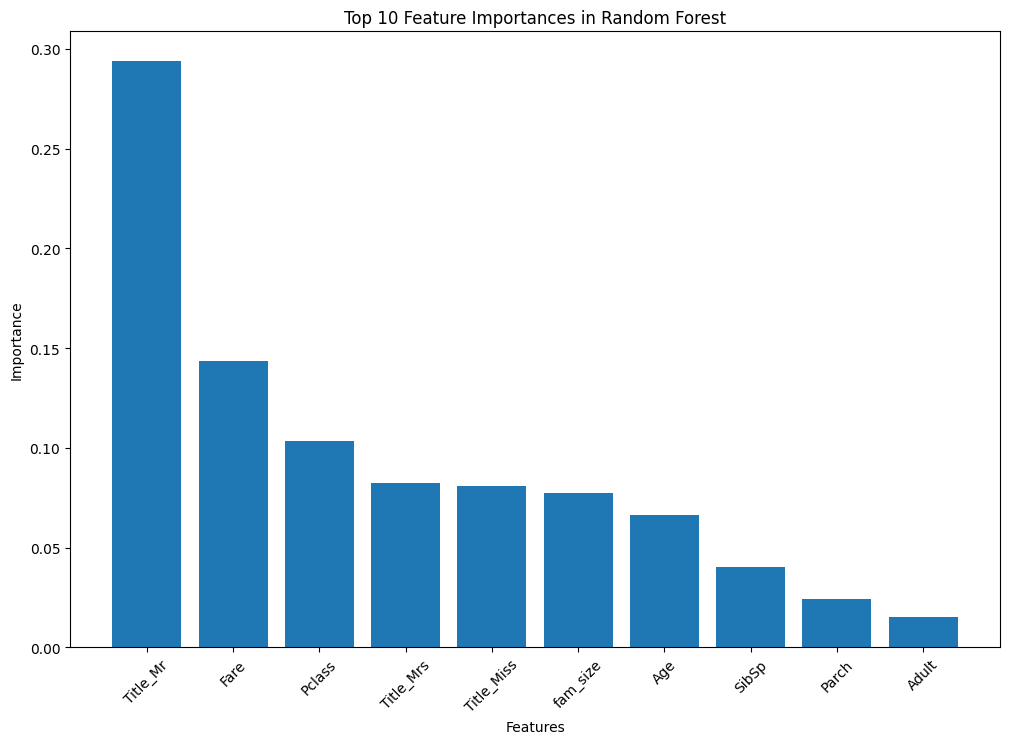

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Sex_female', 'Sex_male',
       'fam_size', 'Alone', 'Adult', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'],
      dtype='object')

In [31]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

decision_tree_clf = DecisionTreeClassifier(max_depth=5)
decision_tree_clf.fit(X_train, y_train)
get_accuracy(decision_tree_clf, X_train, X_test, y_train, y_test)
from sklearn.tree import export_graphviz

export_graphviz(decision_tree_clf,
                out_file='tree_3.dot',
                feature_names=X_train.columns.tolist(),
                class_names=["0", "1"],
                rounded=True,
                filled=True)

# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
rf.fit(X_train, y_train)
get_accuracy(rf, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = np.array(feature_importances)[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

top_n = 10
top_n_indices = sorted_indices[:top_n]
top_n_feature_importances = sorted_feature_importances[:top_n]
top_n_feature_names = sorted_feature_names[:top_n]

plt.figure(figsize=(12, 8))
plt.title("Top 10 Feature Importances in Random Forest")
plt.bar(top_n_feature_names, top_n_feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

df.columns